In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


#inspired by https://www.kaggle.com/code/hajarikishan/drug-classification-using-random-forest-classifier 
#this project is mostly for practice

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Giving a path to dataset
drug_data = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# **Data PreProcessing**

In [4]:
drug_data.shape

(200, 6)

In [5]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
drug_data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
drug_data['Sex'].unique()

array(['F', 'M'], dtype=object)

Can check for other unique values as well


In [9]:
drug_data.rename(columns = {'Sex':'Gender'}, inplace = True)

In [10]:
drug_data.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
drug_data.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# Label Encoding

In [13]:
#importing sklearn libraries and encoding labels for each of the columns
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
drug_data['Gender']=  label_encoder.fit_transform(drug_data['Gender'])
drug_data['BP']=label_encoder.fit_transform(drug_data['BP'])
drug_data['Drug'] = label_encoder.fit_transform(drug_data['Drug'])
drug_data['Cholesterol'] = label_encoder.fit_transform(drug_data['Cholesterol'])

In [14]:
drug_data.head(15)
#as can be seen all is encoded except for Na_to_K

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
5,22,0,2,0,8.607,4
6,49,0,2,0,16.275,0
7,41,1,1,0,11.037,3
8,60,1,2,0,15.171,0
9,43,1,1,1,19.368,0


In [15]:
drug_data['Drug'].unique()
#checking for unique values in drug

array([0, 3, 4, 1, 2])

# Feature Scaling

In [16]:
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(drug_data[['Age', 'Gender', 'Drug']], drug_data.Age, test_size=0.3, random_state=0)

#tells how big the train and test sets are 
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [17]:
#scaling the models now using RobustScaler

from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
X_train_scaled_ro=scaler.fit_transform(X_train)
X_test_scaled_ro=scaler.transform(X_test)

In [18]:
#printing mean values of the train scaled dataset
print('mean value of Age, Gender, Drug features: ', X_train_scaled_ro.mean(axis=0))
print('std value of Age, Gender, Drug features: ', X_test_scaled_ro.std(axis=0))

mean value of Age, Gender, Drug features:  [-0.06181319 -0.45        0.15      ]
std value of Age, Gender, Drug features:  [0.63505424 0.49749372 0.44556066]


# EDA

Number of cells labeled Benign :  103
Number of cells labelled Maligant :  97

% of cells labeled Benign 51.5 %
% of cells labeled Malignant 48.5 %


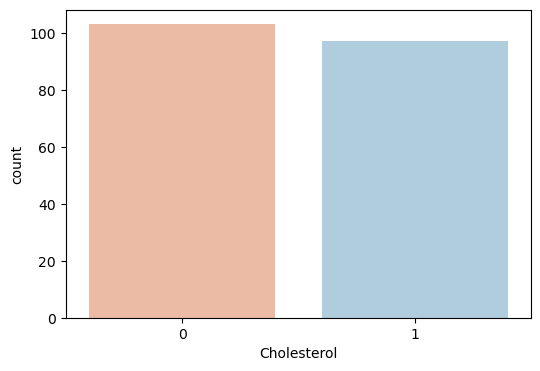

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=drug_data['Cholesterol'], palette='RdBu')

benign, malignant = drug_data['Cholesterol'].value_counts()
#counts
print('Number of cells labeled Benign : ', benign)
print('Number of cells labelled Maligant : ', malignant)

print('')

#percentages
print('% of cells labeled Benign', round(benign/ len(drug_data) * 100,2),'%')

print('% of cells labeled Malignant', round(malignant / len(drug_data) * 100, 2), '%')
#display plot
plt.show()

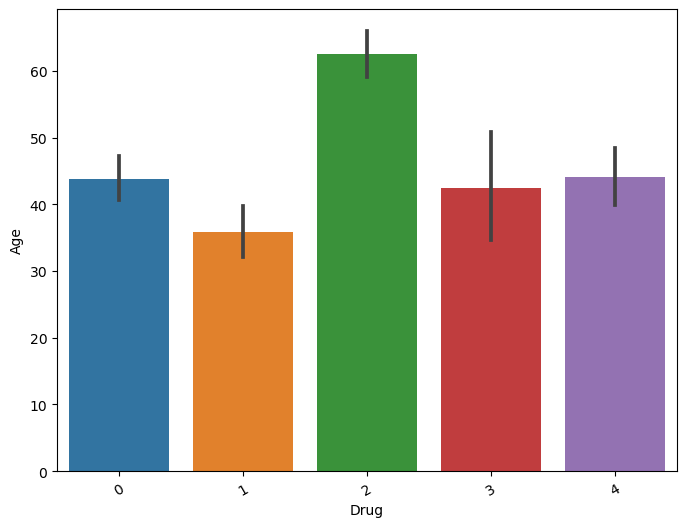

In [20]:
#plotting the graphs of different drugs

plt.figure(figsize=(8,6))
g=sns.barplot(data=drug_data, x='Drug', y='Age')
plt.xticks(rotation=30)
plt.show()

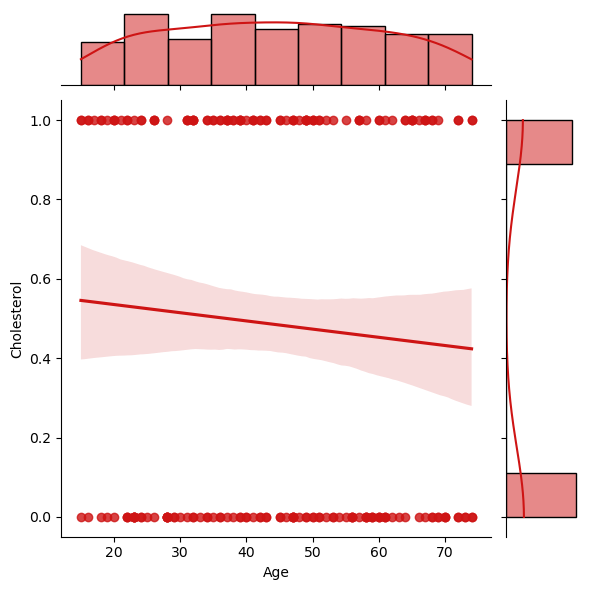

In [21]:
#making a plot to correlate age and cholestorel
sns.jointplot(x=drug_data.loc[:,'Age'],y=drug_data.loc[:,'Cholesterol'], kind='reg', color="#ce1414")
plt.show()


Can see that it is highest cholestorol around 40-50 years of ge

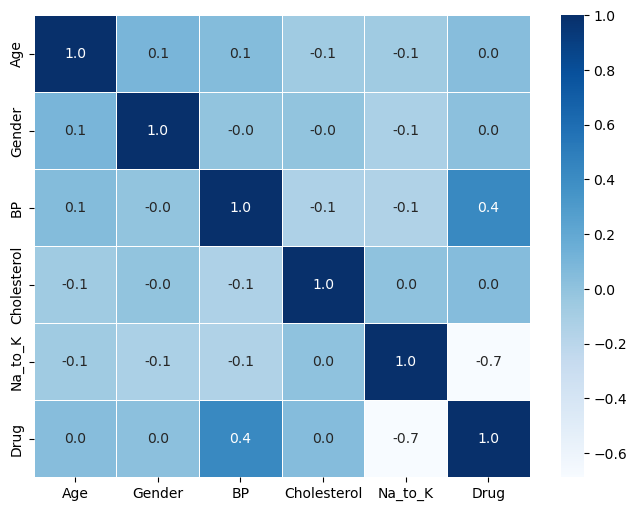

In [22]:
#heatmap to see correlations
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(drug_data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

# Splitting data

In [23]:
drug_data.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [24]:
X = drug_data[['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K']]
Y = drug_data['Drug'] 

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [26]:
#printing train and test shape of each column
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (140, 5)
x_test:  (60, 5)
y_train:  (140,)
y_test:  (60,)


Model Selection and Training

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
score = []
for i in range(1,51):
    clf=RandomForestClassifier(criterion='entropy', n_estimators=i)
    #making clf ^^ and giving it an estimator and entropy value
    clf.fit(x_train,y_train)
    scores=clf.score(x_test,y_test)
    score.append(scores)

In [29]:
score_rate=pd.DataFrame(data=score,columns = ['Score'])
score_rate.insert(loc=0, column ='n_estimators', value=range(1,51))

In [30]:
x = score_rate['n_estimators']
y = score_rate['Score']
fig = px.bar(x,y)
fig.show()

In [31]:
model = RandomForestClassifier(criterion='entropy', n_estimators=30)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [32]:
model.score(x_test,y_test)*100

96.66666666666667

In [33]:
predict = model.predict(x_test)
predict

array([4, 1, 4, 4, 2, 3, 1, 0, 0, 4, 1, 0, 2, 0, 0, 0, 0, 0, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 1, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 2, 4, 4, 4, 4, 0,
       1, 0, 0, 3, 1, 3, 0, 0, 0, 4, 4, 0, 4, 3, 0, 1])

# Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.9666666666666667


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      0.80      0.89         5
           4       0.94      1.00      0.97        16

    accuracy                           0.97        60
   macro avg       0.96      0.91      0.93        60
weighted avg       0.97      0.97      0.97        60



Confusion matrix, got statistics above


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[29,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  0,  0,  4,  1],
       [ 0,  0,  0,  0, 16]])

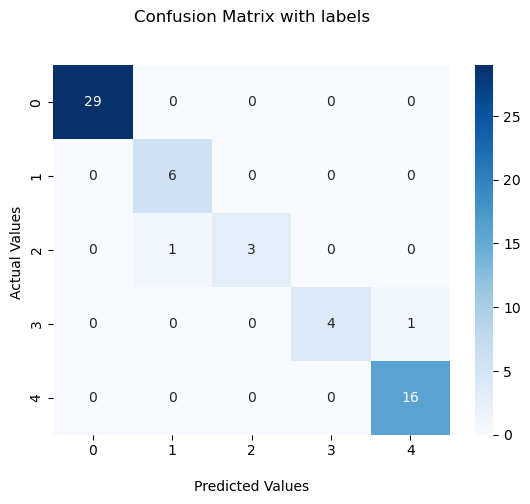

In [37]:
# visualize confusion metrix

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

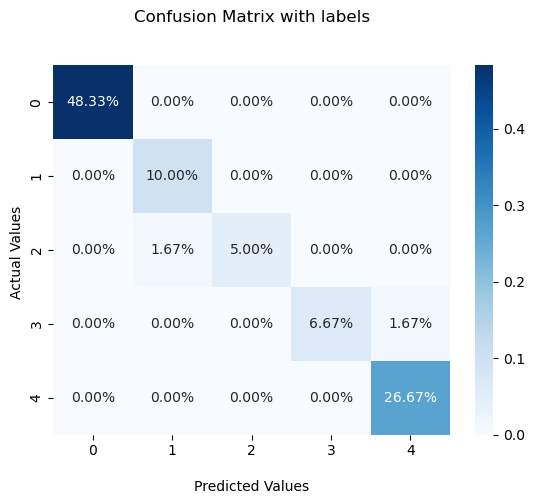

In [38]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

Trying on a sample dataset
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [40]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [41]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [43]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [44]:
clf.fit(digits.data[:-1], digits.target[:-1])


SVC(C=100.0, gamma=0.001)

In [45]:
clf.predict(digits.data[-1:])

array([8])

In [46]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC()

In [47]:
#tarts with the encoding and number
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [48]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [49]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']